# OKCupid visual data

### import needed packages for visualization

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

### load data

In [136]:
df = pd.read_csv('profiles.csv')

### check existing features

In [28]:
df.keys()

Index([u'age', u'body_type', u'diet', u'drinks', u'drugs', u'education',
       u'essay0', u'essay1', u'essay2', u'essay3', u'essay4', u'essay5',
       u'essay6', u'essay7', u'essay8', u'essay9', u'ethnicity', u'height',
       u'income', u'job', u'last_online', u'location', u'offspring',
       u'orientation', u'pets', u'religion', u'sex', u'sign', u'smokes',
       u'speaks', u'status'],
      dtype='object')

### graph 1:


###  precentage of diffrenet body types of the highly drinking and smoking population.
we can see more heavy body types are popular, although there are also thin people 

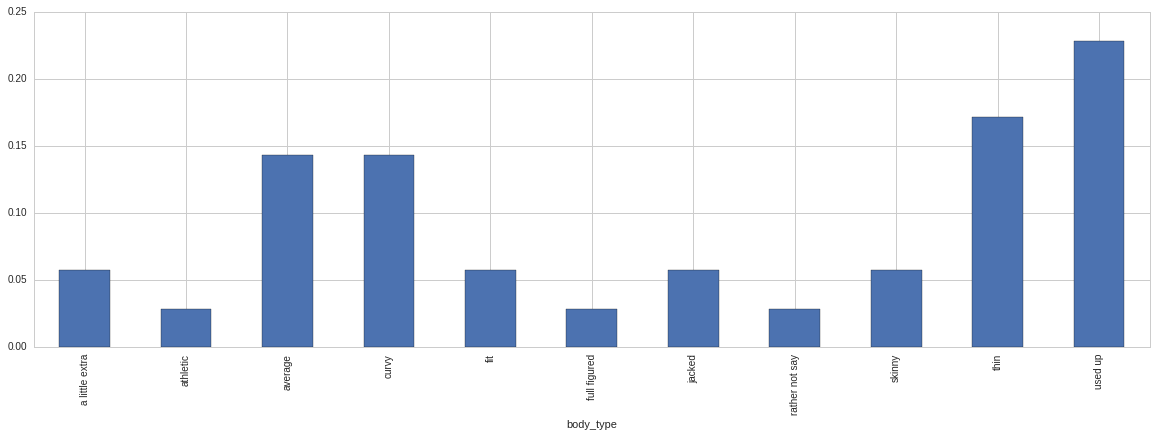

In [283]:
plt.figure(figsize=(20,6))
body_types = df[(df['drinks']=='desperately') & (df['smokes']=='yes')].groupby('body_type').count()['drinks']
tot = body_types.sum()
b = body_types.apply(lambda x: float(x)/tot)
b.plot(kind='bar')
#sns.countplot(data=b.reset_index(),x='body_type' ,palette='viridis')

### graph 2:

### show the age  distribiution  of male and female registered to the okcupid site. 
the male dist is little younger

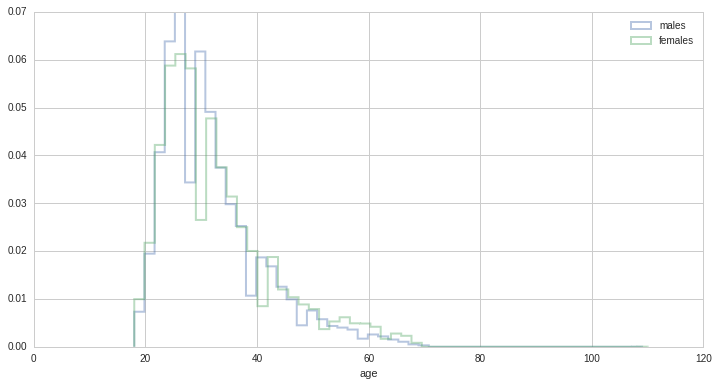

In [284]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['sex']=='m']['age'],hist_kws={"histtype":'step',"linewidth":2},kde=False,label='males',norm_hist =True)
sns.distplot(df[df['sex']=='f']['age'],hist_kws={"histtype":'step',"linewidth":2},kde=False,label='females',norm_hist =True)
plt.legend()

### graph 3:


### heatmap of drinking and smoking corralation. 
show corralation between using drugs and rapidly drinking

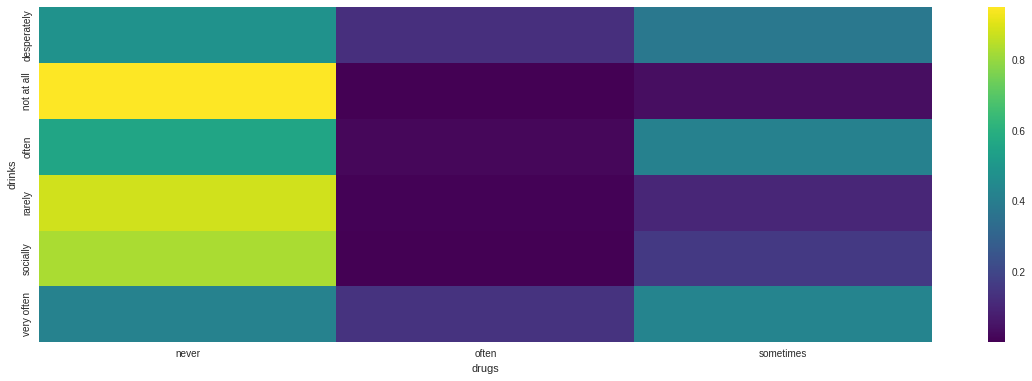

In [157]:
#dayHour = df.groupby(by=['diet','body_type'])value_count()['age'].unstack().dropna()
diet = df.groupby('drinks')['drugs'].value_counts(normalize=True)
#diet.head(20)

diet = diet.unstack().dropna(axis=1)
diet.head()
plt.figure(figsize=(20,6))
sns.heatmap(diet,cmap='viridis')



### graph 4:

### barplot of incomes percentage vs language number

we can see larger average incomes when the number increase

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


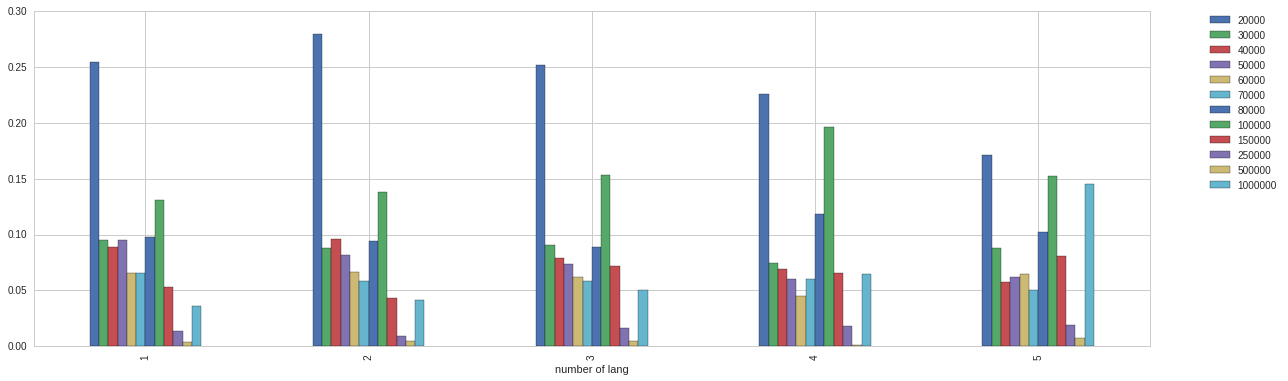

In [156]:
no_minus_one = df[df['income']>0]
no_minus_one.head()
no_minus_one['number of lang']=no_minus_one['speaks'].apply(lambda x: len(str(x).split(',')))
group_lang = no_minus_one.groupby('number of lang')['income'].value_counts(normalize=True)
group_lang.head()
plt.figure(figsize=(20,6))
group_lang = group_lang.unstack().dropna(axis=1).plot(kind='bar',figsize=(20,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### graph 5:

### heatmap of pet loving of alderly population, divided by sex.

we can see that older woman do have cats more then older man :)

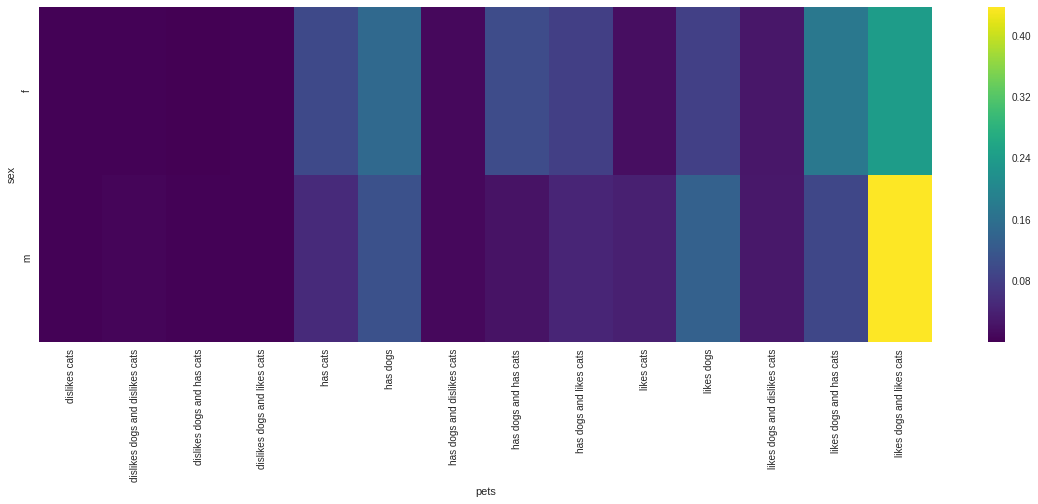

In [239]:
plt.figure(figsize=(20,6))
aged = df[(df['age']>=55) & (df['status']=='single')]
group_pets = aged.groupby('sex')['pets'].value_counts(normalize=True)
s = group_pets.unstack()
s.head(20)
sns.heatmap(s,cmap='viridis')

